In [24]:
import numpy as np
import pandas as pd


In [25]:
df=pd.read_csv("detail.csv")

In [26]:
df.head()

,SMILES,NAME,DIST,CLUSTER
0,CNCC1CC2c3ccccc3Cc3ccccc3N2O1,A2a_000,11.857147,31
1,CN(C)CC1CC2c3ccccc3Cc3ccccc3N2O1,A2a_001,7.857147,31
2,CN1CCN2c3ccccc3Cc3ccccc3C2C1,A2a_002,12.142857,31
3,CN(C)CC1CC2c3ccccc3Cc3ccc(Cl)cc3N2O1,A2a_003,12.285721,31
4,CC(N)Cc1c[nH]c2ccc3c(c12)CCCO3,A2a_004,35.142220,59


In [27]:
df=df.fillna(0)

In [28]:
df.isna().sum()

SMILES     0
NAME       0
DIST       0
CLUSTER    0
dtype: int64

In [29]:
df['SMILES'].head()

0           CNCC1CC2c3ccccc3Cc3ccccc3N2O1
1        CN(C)CC1CC2c3ccccc3Cc3ccccc3N2O1
2            CN1CCN2c3ccccc3Cc3ccccc3C2C1
3    CN(C)CC1CC2c3ccccc3Cc3ccc(Cl)cc3N2O1
4          CC(N)Cc1c[nH]c2ccc3c(c12)CCCO3
Name: SMILES, dtype: object

In [30]:
from rdkit import Chem
from rdkit.Chem import Draw
smi=['c1ccncc1','Cc1ccccc1']
ms = [Chem.MolFromSmiles(x) for x in smi]

In [31]:
img=Draw.MolsToGridImage(ms[0:],molsPerRow=4,subImgSize=(200,200))    

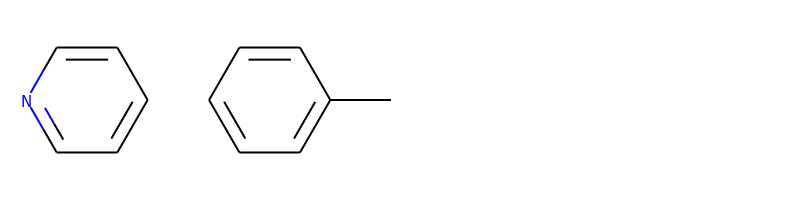

In [32]:
img

In [33]:
def draw_molecules(smiles):
    ms=[Chem.MolFromSmiles(x) for x in smiles]
    img=Draw.MolsToGridImage(ms[0:25],molsPerRow=4,subImgSize=(200,200))
    matrix=[]
    for smi1 in smiles:
        ts=tanimoto_calc(smi1, smiles)
        matrix.append(ts)
        
        
    return img,matrix
    
    
    

In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [35]:
def tanimoto_calc(smi1, smiles):
    ts=[]
    mol1 = Chem.MolFromSmiles(smi1)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    for smi2 in smiles:
        mol2 = Chem.MolFromSmiles(smi2)
        fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
        s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
        ts.append(s)
    return ts
    

In [48]:
df2=df[df['CLUSTER']==28]

In [49]:
k,matrix=draw_molecules(df2['SMILES'])

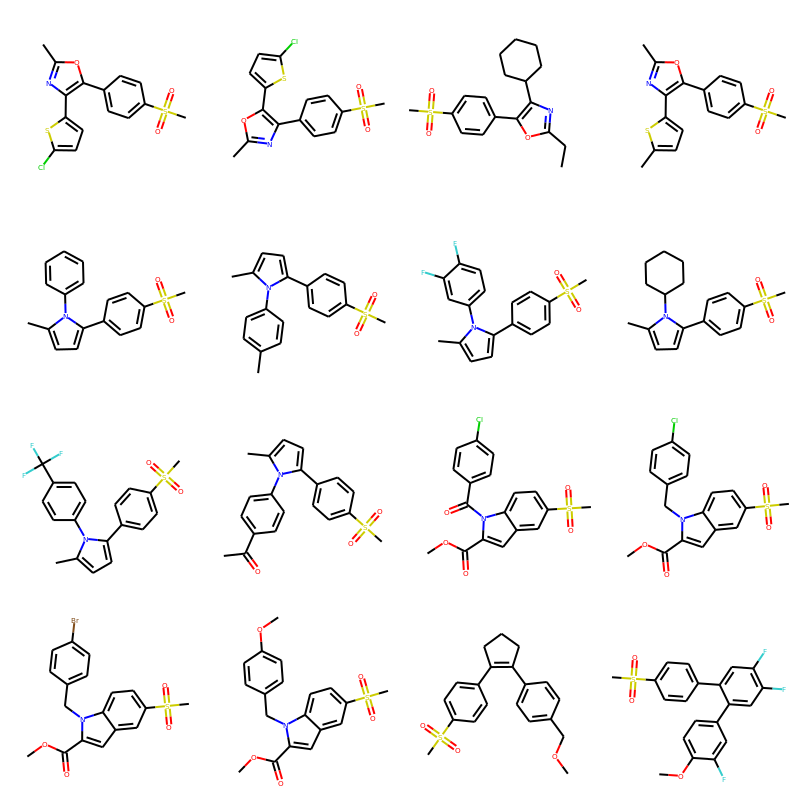

In [50]:
k

In [51]:
array1=np.array(matrix)

In [52]:
array1.shape

(16, 16)

In [53]:
array1[0:5,0:150]

array([[1.   , 0.635, 0.309, 0.741, 0.228, 0.244, 0.212, 0.22 , 0.214,
        0.214, 0.168, 0.156, 0.143, 0.143, 0.215, 0.207],
       [0.635, 1.   , 0.28 , 0.493, 0.231, 0.247, 0.214, 0.222, 0.217,
        0.217, 0.183, 0.17 , 0.156, 0.156, 0.218, 0.21 ],
       [0.309, 0.28 , 1.   , 0.321, 0.207, 0.207, 0.193, 0.308, 0.195,
        0.209, 0.165, 0.153, 0.152, 0.152, 0.273, 0.217],
       [0.741, 0.493, 0.321, 1.   , 0.237, 0.253, 0.22 , 0.228, 0.222,
        0.222, 0.149, 0.137, 0.135, 0.135, 0.224, 0.215],
       [0.228, 0.231, 0.207, 0.237, 1.   , 0.698, 0.6  , 0.388, 0.638,
        0.638, 0.156, 0.143, 0.141, 0.141, 0.236, 0.243]])

In [80]:
pc_components=pd.read_csv('./principal_components/pca.csv')

In [81]:
pc_components['cluster']=df['cluster']

In [82]:
pc_components.head()

,Unnamed: 0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_89,PC_90,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,cluster
0,0,-2.360594,0.953844,-0.634530,-0.094114,0.178775,0.030397,-0.119159,-0.264334,-0.046721,...,-0.032073,0.199966,0.029187,0.095497,0.082277,0.012668,-0.004469,-0.044846,-0.008464,920
1,1,-2.458576,1.033975,-0.783516,-0.160256,-0.056400,0.096004,-0.194041,-0.267257,0.022588,...,-0.034885,-0.005929,0.050189,-0.020497,-0.044095,-0.017359,-0.006157,0.013694,0.045232,779
2,2,-2.341672,0.935984,-0.558092,0.015772,0.266814,0.078536,-0.156525,-0.043789,-0.170631,...,-0.083992,-0.003432,0.054162,-0.010957,-0.060961,0.026655,-0.007382,-0.018859,0.046710,920
3,3,-2.358118,0.964963,-0.530191,0.063926,0.076148,0.054880,-0.121319,-0.146387,0.072815,...,-0.039338,-0.076880,0.019626,-0.065771,0.012452,0.014269,0.034141,-0.010138,0.040195,920
4,4,-2.331269,0.975178,-0.517117,0.047462,0.225762,0.052049,-0.203067,-0.016534,-0.079955,...,-0.027601,-0.057889,0.101321,-0.021123,-0.024189,-0.013200,-0.052902,0.036605,0.081149,920


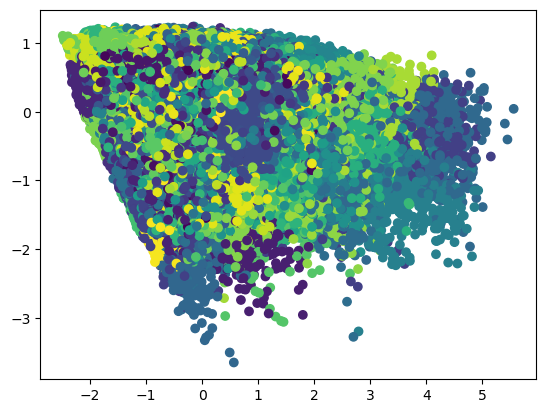

In [86]:
import matplotlib.pyplot as plt
plot=plt.scatter(pc_components['PC_1'], pc_components['PC_2'], c=pc_components['cluster'])
#plt.legend(handles=plot.legend_elements()[0], labels=list(pc_components['cluster']))
plt.show()

In [90]:
pc_components['cluster'].value_counts()

30     1800
502    1686
301    1629
535    1617
151    1561
       ... 
382      98
128      96
810      91
550      55
187      46
Name: cluster, Length: 1000, dtype: int64